In [2]:
# Load the required packages
import numpy as np
import scipy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels as sm
import sklearn as sk

## Resources

Task 1  
https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html

Task 2  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html,  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html,  


Task 3  
https://numpy.org/doc/2.2/reference/arrays.ndarray.html
https://www.datacamp.com/tutorial/python-dictionary-append
https://numpy.org/doc/2.1/reference/generated/numpy.median.html
https://docs.python.org/3/library/functions.html
https://docs.python.org/3/tutorial/inputoutput.html

Task 4  
https://matplotlib.org/stable/gallery/statistics/hist.html
https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
https://www.w3schools.com/python/ref_string_capitalize.asp

Task 5  
https://www.geeksforgeeks.org/convert-numpy-array-to-dataframe/
https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
https://saturncloud.io/blog/how-to-create-new-values-in-a-pandas-dataframe-column-based-on-values-from-another-column/#:~:text=To%20create%20the%20new%20column,and%20returns%20the%20corresponding%20category.
https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html
https://www.digitalocean.com/community/tutorials/python-convert-numpy-array-to-list
https://www.geeksforgeeks.org/how-to-add-a-legend-to-a-scatter-plot-in-matplotlib/

Task 6
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
https://www.statology.org/matplotlib-remove-frame/

# Task 1: Source the Data Set
1. Import the Iris data set from the sklearn.datasets module.
2. Explain, in your own words, what the load_iris() function returns.

In [3]:
# Save the iris dataset in the iris object
iris = sk.datasets.load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The load_iris() function returns a dictionary-like object which contains multiple obkects, including: the iris dataset and the metadata of the dataset. This keys of this object are 'data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'.

# Task 2: Explore the Data Structure
Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [5]:
# Display the shape of the Iris data
iris.data.shape

(150, 4)

The Iris dataset contains 150 rows (each sample is in a separate row) and 4 collums (each collumn corresponds to sepal length, sepal width, petal length and petal width).

In [6]:
# Display the first 5 rows
iris.data[0:5,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The dataset above contains info about sepal length, sepal width, petal length and petal width for the first 5 samples in the dataset.

In [7]:
# Display the last five rows
iris.data[-5:len(iris.data),]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

The dataset above contains info about sepal length, sepal width, petal length and petal width for the last 5 samples in the dataset.

In [8]:
# Display the feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The feature_names object gives the explanation what does each collumn in the dataset represents.

In [9]:
# Display the sample types in the dataset
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

The target_names shows what sample types are present in the dataset.

# Task 3: Summarize the Data
For each feature in the dataset, calculate and display:  
**mean  
minimum  
maximum  
standard deviation  
median**  

In [10]:
# Transpose the iris dataset to separate the values of each feature in a separate list
iris_transposed = iris.data.transpose()

# Store the values of each feature in separate objects
sepal_length_list = iris_transposed[0]
sepal_width_list = iris_transposed[1]
petal_length_list = iris_transposed[2]
petal_width_list = iris_transposed[3]

In [11]:
# Calculate summary statistics of the dataset and store in the dictionary
def summary_statistics(dataset):

    # Create empty dictionary to store summary stats
    adict = {}

    # Compute summary stats and store in the dictionary
    adict["mean"] = round(dataset.mean(), 2)
    adict["standard_deviation"] = round(dataset.std(), 2)
    adict["minima"] = round(dataset.min(), 2)
    adict["maximum"] = round(dataset.max(), 2)
    adict["median"] = round(np.median(dataset), 2)

    return(adict)


In [12]:
#Compute summary stats of each feature
slength_sum_stats = summary_statistics(sepal_length_list)
swidth_sum_stats = summary_statistics(sepal_width_list)
plength_sum_stats = summary_statistics(petal_length_list)
pwidth_sum_stats = summary_statistics(petal_width_list)

In [13]:
# show_sum_stats prints summary statistics of a feature
# while using values stored in the dictionary
def show_sum_stats(feature_name, adict):
    
    print(f'''
Summary statistics of a {feature_name}
Mean: {adict["mean"]}
Standard deviation: {adict["standard_deviation"]}
Minima: {adict["minima"]}
Maxima: {adict["maximum"]}
Median: {adict["median"]}
        ''')

In [14]:
show_sum_stats("sepal length", slength_sum_stats)


Summary statistics of a sepal length
Mean: 5.84
Standard deviation: 0.83
Minima: 4.3
Maxima: 7.9
Median: 5.8
        


In [15]:
show_sum_stats("sepal width", swidth_sum_stats)


Summary statistics of a sepal width
Mean: 3.06
Standard deviation: 0.43
Minima: 2.0
Maxima: 4.4
Median: 3.0
        


In [16]:
show_sum_stats("petal length", plength_sum_stats)


Summary statistics of a petal length
Mean: 3.76
Standard deviation: 1.76
Minima: 1.0
Maxima: 6.9
Median: 4.35
        


In [17]:
show_sum_stats("petal width", pwidth_sum_stats)


Summary statistics of a petal width
Mean: 1.2
Standard deviation: 0.76
Minima: 0.1
Maxima: 2.5
Median: 1.3
        


# Task 4: Visualize Features
Plot histograms for each feature using matplotlib.  
Add appropriate titles and axis labels.

In [18]:
def plotting_histogram(apart, dimension, dataset):
    # Creating a plotting axes
    fig, axs = plt.subplots(1, 1,
                            figsize =(10, 7), 
                            tight_layout = True)

    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']: 
        axs.spines[s].set_visible(False) 

    # Add x, y gridlines 
    axs.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6) 

    # Plotting the histogram of a feature
    axs.hist(dataset, bins=15, 
                    color='skyblue', edgecolor='black')

    # Set the names of x and y axis and title
    plt.xlabel(f"{apart} samples")
    plt.ylabel(f"{apart} {dimension} in cm")
    plt.title(f"The {apart} {dimension.capitalize()} in cm")
    plt.show()

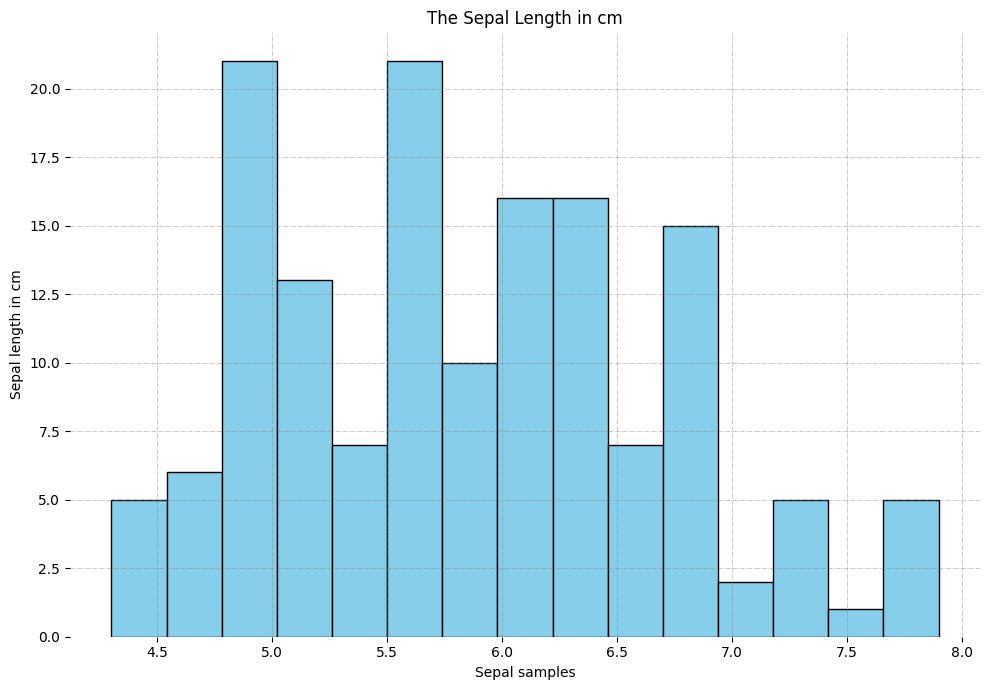

In [19]:
plotting_histogram("Sepal", "length", sepal_length_list)

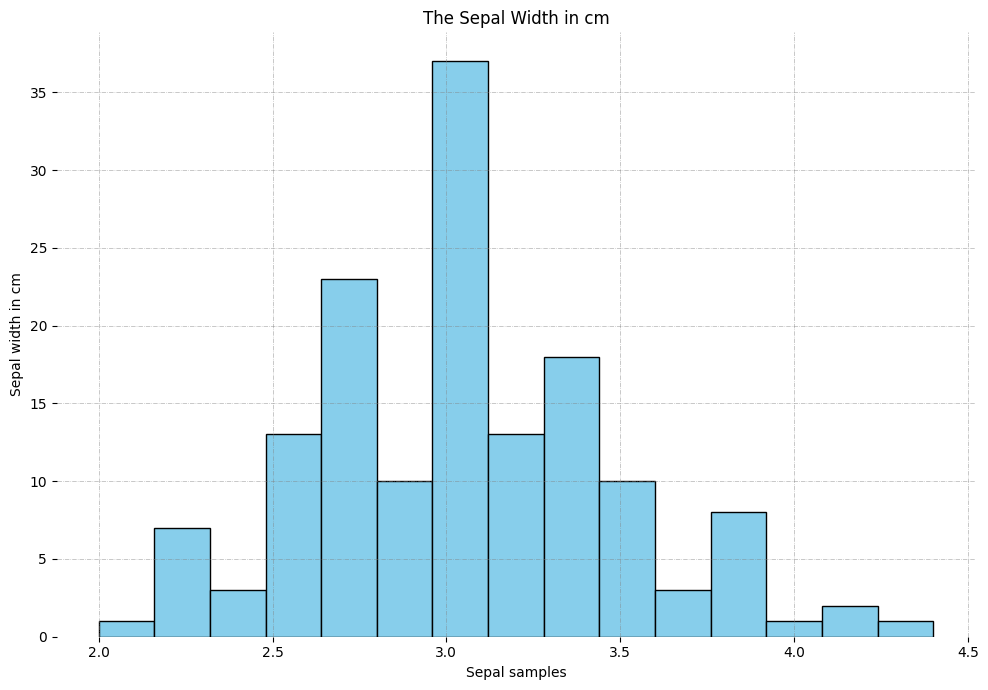

In [20]:
plotting_histogram("Sepal", "width", sepal_width_list)

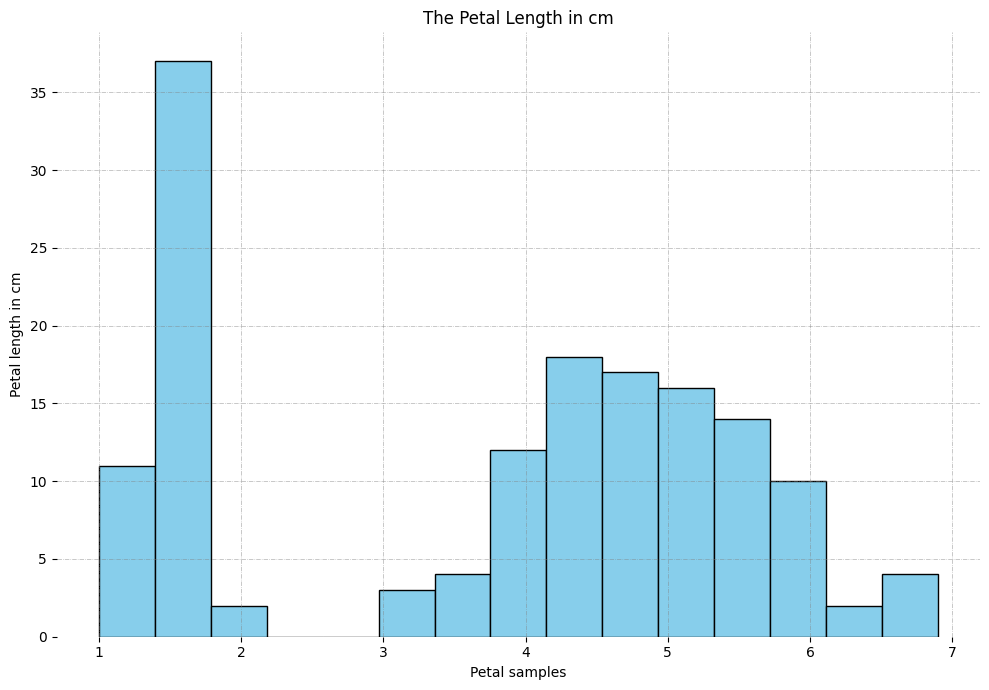

In [21]:
plotting_histogram("Petal", "length", petal_length_list)

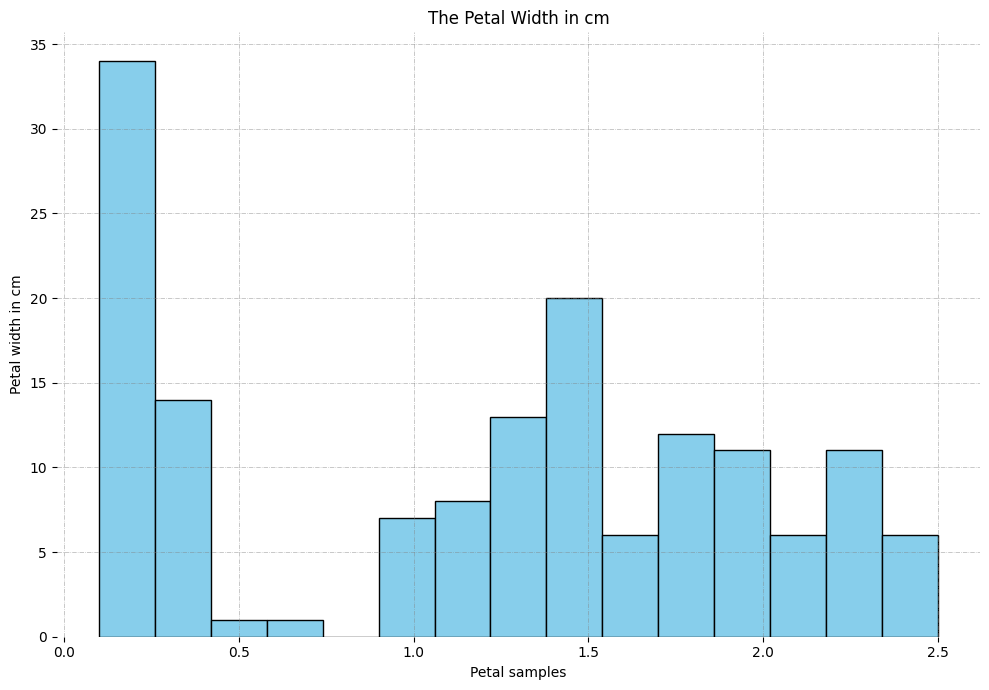

In [22]:
plotting_histogram("Petal", "width", petal_width_list)

# Task 5: Investigate Relationships  
Choose any two features from the data set and create a scatter plot of them.  
Color-code the three different classes of the scatter plot points.

In [77]:
# Convert numpy dnarray to pd df
df = pd.DataFrame(iris.data)

In [78]:
# Check out the feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [79]:
# Store the feature names in a list
category_names = ["sepal_length_cm", "sepal_width_cm", 
                     "petal_length_cm", "petal_width_cm"]

# Rename df columns names with the feature names stored in the category names
df.columns = category_names

In [80]:
df["class"] = iris.target

In [81]:
# Define the function to categorize classess
def categorize_class(aclass):
    
    if aclass == 0:
        return 'setosa'
    elif aclass == 1:
        return 'versicolor'
    else:
        return 'virginica'

In [82]:
# Use apply and categorize_class functions to create a new column in a dataframe
# while using a "class" column as a reference
df["species"] = df["class"].apply(categorize_class)

In [83]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


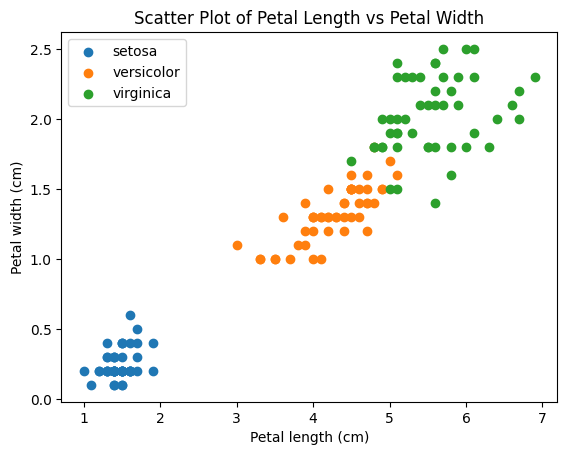

In [84]:
# Plot three scatter plots for each type
for name in iris.target_names:
    
    # Create a temporary df with details for a single type 
    temp_df = df[df["species"] == name]
    
    # Select x and y cordinates as petal length and width, resptectively
    x = temp_df["petal_length_cm"]
    y = temp_df["petal_width_cm"]
    
    # Plot a scatter plot with previously defined cordinates and
    # use type name as the label of the legend
    plt.scatter(x, y, label=name)

# store type names in a list
target_names = iris.target_names.tolist()

# Set a legend
plt.legend(target_names)

# Name x and y axes and set the title of the plot
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatter Plot of Petal Length vs Petal Width")
plt.show()

# Task 6: Analyze Relationship
Use numpy.polyfit to add a regression line to the scatter plot from Task 5.

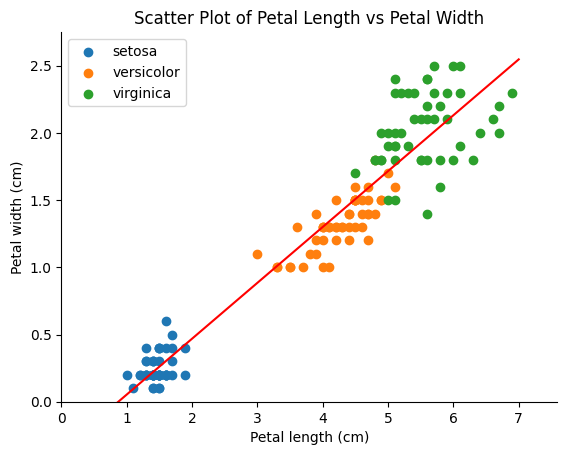

In [127]:
# Plot three scatter plots for each type
for name in iris.target_names:
    
    # Create a temporary df with details for a single type 
    temp_df = df[df["species"] == name]
    
    # Select x and y cordinates to petal length and width, resptectively
    x = temp_df["petal_length_cm"]
    y = temp_df["petal_width_cm"]
    
    # Plot a scatter plot with previously defined cordinates and
    # use type name as the label of the legend
    plt.scatter(x, y, label=name)
    

# Set the x and y cordinates to petal length and width, resptectively
x = df["petal_length_cm"]
y = df["petal_width_cm"]

# Create the cordinates of the regression line using np.polyfit and np.poly1d functions
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create a dataset with hundred values that range between 0 and 7
xp = np.linspace(0, 7, 100)
# Plot the regression line
_ = plt.plot(xp, p(xp), color='red')

# Set the limits for the x and y axes where the bottom limit is 0 for both axes
# and the highest value is the largest cordinate + 10% of it.
plt.ylim(0, (y.max() + (y.max()*.1)))
plt.xlim(0, (x.max() + (x.max()*.1)))
    
# Store type names in a list
target_names = iris.target_names.tolist()

# Set a legend
plt.legend(target_names)

# Name x and y axes and set the title of the plot
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Scatter Plot of Petal Length vs Petal Width")

# Remove only right and top frames from plot
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

plt.show()